Garima Chaudhary:

1) Dataframe overview and cleanup
2) Univariate analysis (Remote ratio, Company size)
3) Bivariate analysis (Salary vs Experience Level, Salary(in USD) vs company size, Experience level vs Employee residence)


Dataframe overview and cleanup

In [1]:
#Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics as stats

#read csv file and display first few rows

salary = "./ds_salaries.csv"
df=pd.read_csv(salary)
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
#find number or rows and columns in the dataframe

rows=len(df.axes[0])
columns=len(df.axes[1])
print(f"No. of rows in dataframe: {rows}\nNo. of columns in dataframe: {columns}")

#Dataset has 3755 rows and 11 columns

No. of rows in dataframe: 3755
No. of columns in dataframe: 11


In [3]:
#Checking any empty cells in the dataset

empty_values = df.isna().sum()
empty_values

#No empty values in any column

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
#Dropping the redundant columns for salary and salary currency as they are inbuilt in salary(in USD)

df=df.drop(['salary','salary_currency'], axis=1)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [5]:
# Finding duplicate rows for all columns

duplicate_rows = df[df.duplicated()]
duplicate_rows


#Found total 1171 duplicate rows

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,US,100,US,L


In [6]:
# Remove duplicate rows

df_clean = df.drop_duplicates(keep="first", inplace=False)
df_clean

#After removing duplicate rows, we are left with 2584 rows dataframe

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [7]:
#exporting cleaned csv file to the output folder

df_clean.to_csv("output_data_GC/salaries.csv")

In [8]:
#Applying .info() method on the dataframe to get summary of the dataframe

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary_in_usd       2584 non-null   int64 
 5   employee_residence  2584 non-null   object
 6   remote_ratio        2584 non-null   int64 
 7   company_location    2584 non-null   object
 8   company_size        2584 non-null   object
dtypes: int64(3), object(6)
memory usage: 201.9+ KB


In [9]:
# Fnding different entries in each column

for column in df_clean.columns:
    entries = {column: df_clean[column].value_counts()} 

    print (f"\n{entries}")

          


{'work_year': 2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64}

{'experience_level': SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64}

{'employment_type': FT    2547
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64}

{'job_title': Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64}

{'salary_in_usd': 100000    58
150000    56
120000    51
200000    47
130000    39
          ..
314100     1
195800     1
262500     1
209450     1
94665      1
Name: salary_in_usd, Length: 1035, dtype: int64}

{'employee_residence': US    1893
GB     150
CA      81
IN     

In [10]:
#Descriptive Statistics for numerical columns 

describe_summary = df_clean.describe()
describe_summary

,work_year,salary_in_usd,remote_ratio
count,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746
std,0.749179,67136.837329,48.163707
min,2020.000000,5132.000000,0.000000
25%,2022.000000,84975.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


Univariate analysis

In [11]:
#Distribution Analysis: Visualize the distribution of variables like remote_ratio and company_size.

#Salary Analysis: Analyze how the salary varies with factors like experience_level, company_size.

#Categorical Analysis: Analyze how is the distribution of categorical variables like experience_level and employe_residence with count of jobs.


In [12]:
#Creating dataframe for remote_ratio column to show work mode

remote_work= df_clean["remote_ratio"].value_counts().sort_index()
remote_work

0      1186
50      187
100    1211
Name: remote_ratio, dtype: int64

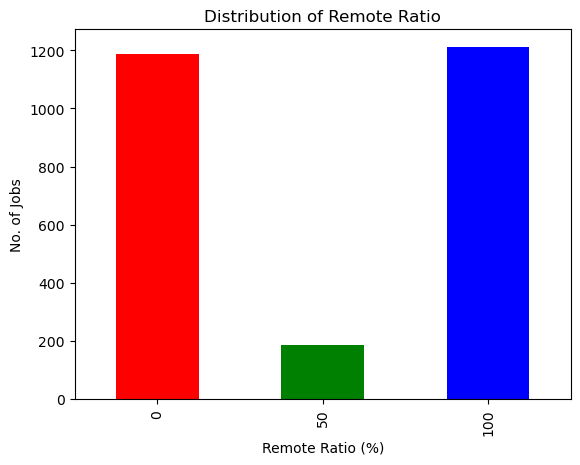

In [13]:
# Plotting the distribution of remote_ratio

my_colors=['red', 'green', 'blue']
remote_work.plot(kind="bar", color = my_colors)
plt.title('Distribution of Remote Ratio')
plt.xlabel("Remote Ratio (%)")
plt.ylabel("No. of Jobs")
plt.savefig("output_data_GC/Fig1_distribution_remote_ratio.png")
plt.show()

#A significant number(45.89%) of employees do not work remotely at all (0% remote ratio). 
#Another substantial group (46.86%) works fully remotely (100% remote ratio). 
#Only a small fraction(7.23%) of employees have a 50% remote work arrangement.

In [14]:
#Creating dataframe for company_size column to show distribution of data science jobs by company size

jobs_by_company_size = df_clean["company_size"].value_counts()
jobs_by_company_size

M    2028
L     409
S     147
Name: company_size, dtype: int64

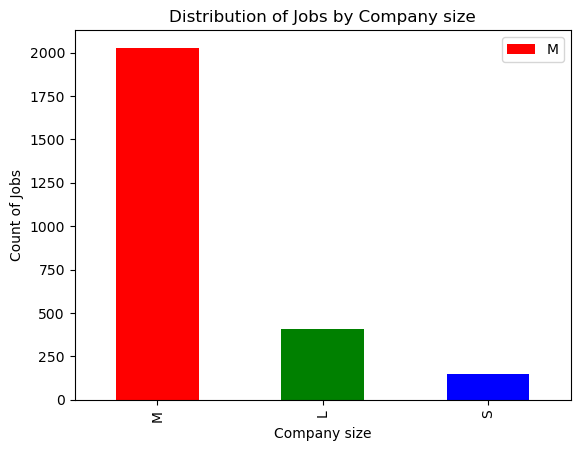

In [15]:
# Plotting the distribution of jobs by company size

my_colors=['red', 'green', 'blue']
jobs_by_company_size.plot(kind="bar", color = my_colors)
plt.title('Distribution of Jobs by Company size')
plt.xlabel("Company size")
plt.ylabel("Count of Jobs")
plt.legend(loc="best", labels="M-Medium")
plt.savefig("output_data_GC/Fig2_distribution_jobs_company_size.png")
plt.show()

#A significant number (78.48%) of individuals work for medium(M)-sized companies, followed by 15.82% work for large(L) and then 5.68% work for small(S) size companies. 


 Bivariate analysis 

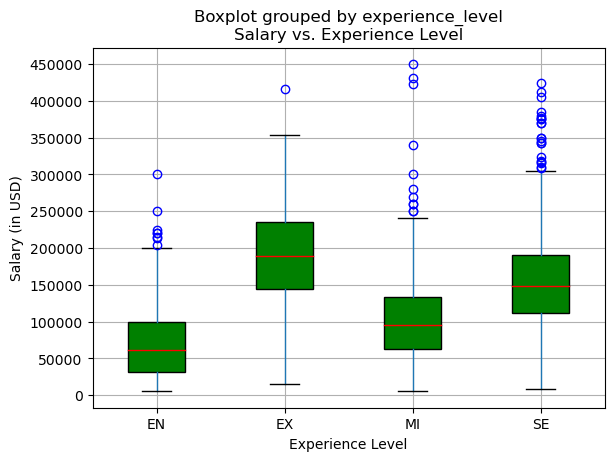

In [16]:
# Salary vs. Experience Level
a="blue"
b="red"
c="green"
df_clean.boxplot(column=["salary_in_usd"], by=["experience_level"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))
plt.title('Salary vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

plt.savefig("output_data_GC/Fig3_salary_experience_level.png")
plt.show()

#There's a clear trend that as experience level increases, the median salary also increases. 
#The Executive-level (EX) experience has the highest median salary, followed by Entry-level(EN), Mid-level (MI), and Senior-level (SE). 
#The spread of salaries (as shown by the height of the boxes) also seems to increase with experience, indicating more variability in salaries for more experienced roles.

In [17]:
# Removing outliers in salary_in_usd for different categories of experience_level: Salary vs. Experience Level 


df_remove_outlier1=df_clean[(df_clean["salary_in_usd"]<400000)&(df_clean["experience_level"]=="EX")]
df_remove_outlier2=df_clean[(df_clean["salary_in_usd"]<200000)&(df_clean["experience_level"]=="EN")]
df_remove_outlier3=df_clean[(df_clean["salary_in_usd"]<240000)&(df_clean["experience_level"]=="MI")]
df_remove_outlier4=df_clean[(df_clean["salary_in_usd"]<309000)&(df_clean["experience_level"]=="SE")]
dataframes = [df_remove_outlier1,df_remove_outlier2, df_remove_outlier3, df_remove_outlier4]
final_df_remove_outlier =pd.concat(dataframes)
final_df_remove_outlier



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
58,2023,EX,FT,Data Scientist,258750,US,0,US,M
59,2023,EX,FT,Data Scientist,185000,US,0,US,M
183,2020,EX,FT,Staff Data Analyst,15000,NG,0,CA,M
203,2023,EX,FT,Data Engineer,220000,US,0,US,M
204,2023,EX,FT,Data Engineer,205000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3740,2020,SE,FT,Data Science Manager,190200,US,100,US,M
3744,2020,SE,FT,Machine Learning Engineer,45618,HR,100,HR,S
3745,2021,SE,FT,Director of Data Science,168000,JP,0,JP,S
3749,2021,SE,FT,Data Specialist,165000,US,100,US,L


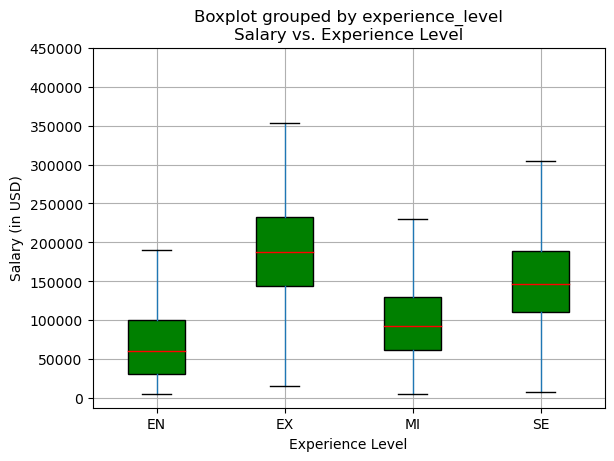

In [18]:
# Plotting Salary vs. Experience Level (with removed outliers in salary_in_usd)

a="blue"
b="red"
c="green"
final_df_remove_outlier.boxplot(column=["salary_in_usd"], by=["experience_level"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))
plt.title('Salary vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

plt.savefig("output_data_GC/Fig4_salary_experience_level_removed_outliers.png")
plt.show()

#There's a clear trend that as experience level increases, the median salary also increases. 
#The Executive-level (EX) experience has the highest median salary, followed by Entry-level(EN), Mid-level (MI), and Senior-level (SE). 
#The spread of salaries (as shown by the height of the boxes) also seems to increase with experience, indicating more variability in salaries for more experienced roles.

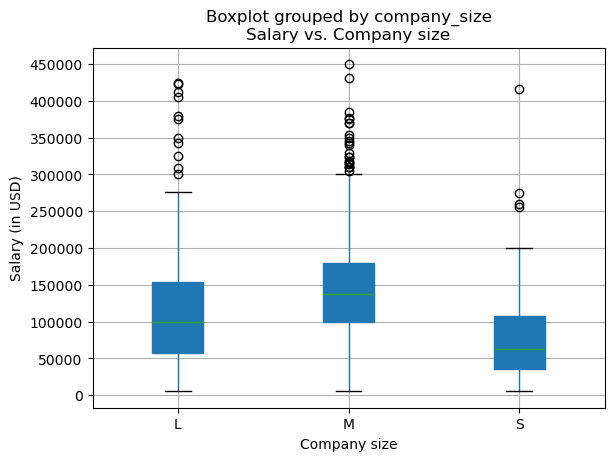

In [19]:
# Salary vs. Company_size

df_clean.boxplot(column=["salary_in_usd"], by=["company_size"], patch_artist=True)
plt.title('Salary vs. Company size')
plt.xlabel('Company size')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

plt.savefig("output_data_GC/Fig5_salary_company_size.png")
plt.show()

#There's a clear trend that the medium(M) size companies provide more median salaries followed by large(L) companies and then followed by small(S) companies. increases, the median salary also increases. 
#The spread of salaries (as shown by the height of the boxes) is more for large size companies.

In [20]:
# Removing outliers in salary_in_usd for different sizes of Companies: Salary vs. Company size


df_remove_outlier_a=df_clean[(df_clean["salary_in_usd"]<300000)&(df_clean["company_size"]=="L")]
df_remove_outlier_b=df_clean[(df_clean["salary_in_usd"]<303000)&(df_clean["company_size"]=="M")]
df_remove_outlier_c=df_clean[(df_clean["salary_in_usd"]<175000)&(df_clean["company_size"]=="S")]

dataframes = [df_remove_outlier_a,df_remove_outlier_b, df_remove_outlier_c]
final_df_remove_outlier_d =pd.concat(dataframes)
final_df_remove_outlier_d



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
5,2023,SE,FT,Applied Scientist,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,US,0,US,L
13,2023,EN,FT,Applied Scientist,213660,US,0,US,L
14,2023,EN,FT,Applied Scientist,130760,US,0,US,L
...,...,...,...,...,...,...,...,...,...
3731,2020,MI,FT,Data Scientist,62726,FR,50,LU,S
3735,2021,EN,PT,AI Scientist,12000,BR,100,US,S
3744,2020,SE,FT,Machine Learning Engineer,45618,HR,100,HR,S
3745,2021,SE,FT,Director of Data Science,168000,JP,0,JP,S


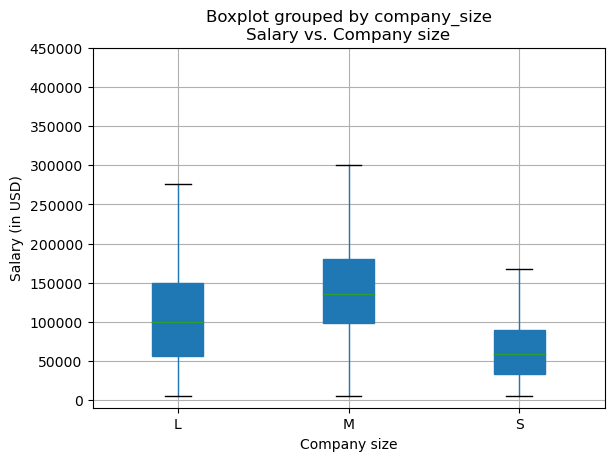

In [21]:
# Plotting Salary vs. Company size (with removed outliers in salary_in_usd)

final_df_remove_outlier_d.boxplot(column=["salary_in_usd"], by=["company_size"], patch_artist=True)
plt.title('Salary vs. Company size')
plt.xlabel('Company size')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

plt.savefig("output_data_GC/Fig6_salary_company_size_removed_outliers.png")
plt.show()

#There's a clear trend that the medium size companies provide more median salaries followed by large companies and then followed by small companies. increases, the median salary also increases. 
#The spread of salaries (as shown by the height of the boxes) is more for large size companies.

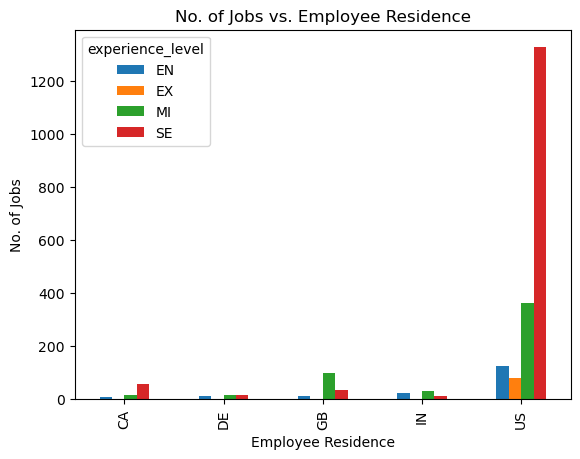

In [22]:
# Plotting Number of Jobs vs. Employee Residence and Experience Level (demonstrating for two categorical variables)

reduced_dataframe=df_clean.groupby(["employee_residence"]).experience_level.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["employee_residence"])["no_of_jobs"].sum().nlargest(5)
making_dataframe=largest_five_residence_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employee_residence"].isin(making_dataframe["employee_residence"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="employee_residence", columns ="experience_level", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig7_jobs_employee_residence_experience_level.png")
plt.show()

# This plot shows the distribution of experience levels (Executive-level (EX), Entry-level(EN), Mid-level (MI), Senior-level (SE)) in the top 5 (based on the number of jobs) employee residences. 
#For the employees who reside in US, majority of them fall under the category of senior-level (SE) experience followed by middle-level (MI) experience.

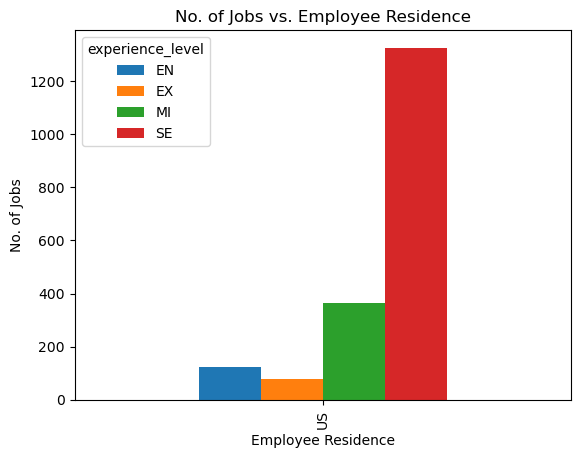

In [23]:
# Plotting Number of Jobs vs. Employee Residence and Experience Level (for US employee residents only)

reduced_dataframe=df_clean.groupby(["employee_residence"]).experience_level.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["employee_residence"])["no_of_jobs"].sum().nlargest(1)
making_dataframe=largest_five_residence_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employee_residence"].isin(making_dataframe["employee_residence"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="employee_residence", columns ="experience_level", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig8_jobs_employee_residence_experience_level_US_only.png")
plt.show()

# This plot shows the distribution of experience levels (Executive-level (EX), Entry-level(EN), Mid-level (MI), Senior-level (SE)) in US region based on number of jobs. 
#In US, highest number of jobs(73.25% of total jobs) have employed people with Senior-level (SE) type of experience followed by middle-level (MI) experience.

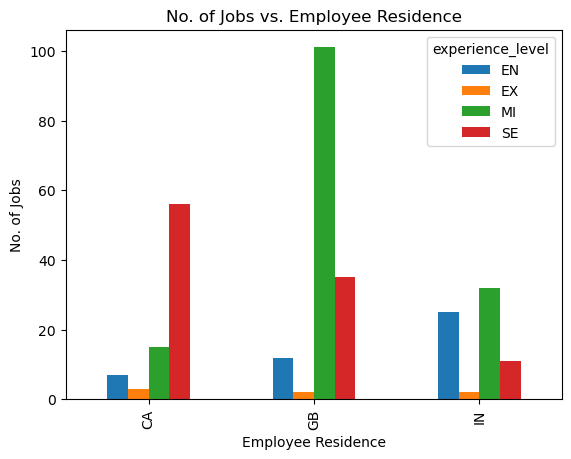

In [24]:
# Plotting Number of Jobs vs. Employee Residence and Experience Level (excluding US employee residents)

df_clean_excluded_US=df_clean.loc[df_clean["employee_residence"]!= "US",:]
reduced_dataframe=df_clean_excluded_US.groupby(["employee_residence"]).experience_level.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["employee_residence"])["no_of_jobs"].sum().nlargest(3)
making_dataframe=largest_five_residence_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employee_residence"].isin(making_dataframe["employee_residence"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="employee_residence", columns ="experience_level", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig9_jobs_employee_residence_experience_level_after_US.png")
plt.show()

# This plot shows the distribution of experience levels (Executive-level (EX), Entry-level(EN), Mid-level (MI), Senior-level (SE)) in next top 3 employee residence countries after US.
#After US, the next top 3 employee residence countries (CA, GB, IN) contributes to 11.64% employmnet of the total jobs.

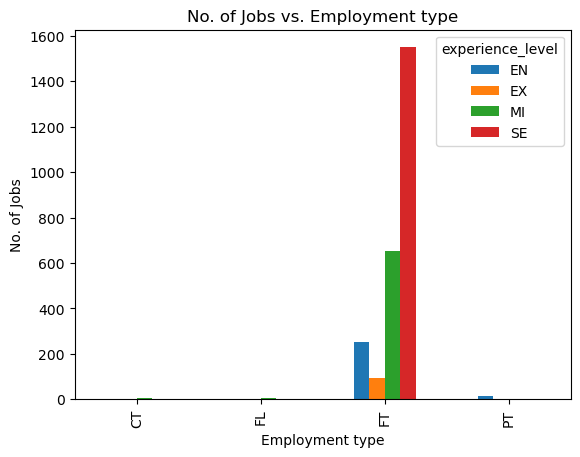

In [25]:
# Plotting Number of Jobs vs. Employment types and Experience Level (demonstrating for two categorical variables)

reduced_dataframe=df_clean.groupby(["employment_type"]).experience_level.value_counts().reset_index(name="no_of_jobs")
employment_types_series=reduced_dataframe.groupby(["employment_type"])["no_of_jobs"].sum()
making_dataframe=employment_types_series.to_frame().reset_index()

final_dataframe_employment_types = reduced_dataframe[reduced_dataframe["employment_type"].isin(making_dataframe["employment_type"])]
pivot_dataframe_plotting=final_dataframe_employment_types.pivot(index="employment_type", columns ="experience_level", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employment type')
plt.xlabel('Employment type')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig10_jobs_employment_type_experience_level.png")
plt.show()

#This plot shows the distribution of different experience levels (Executive-level (EX), Entry-level(EN), Mid-level (MI), Senior-level (SE)) 
# jobs among FT(Full Time) employees since rest of emloyment types (1.43%) have negligible number of jobs.


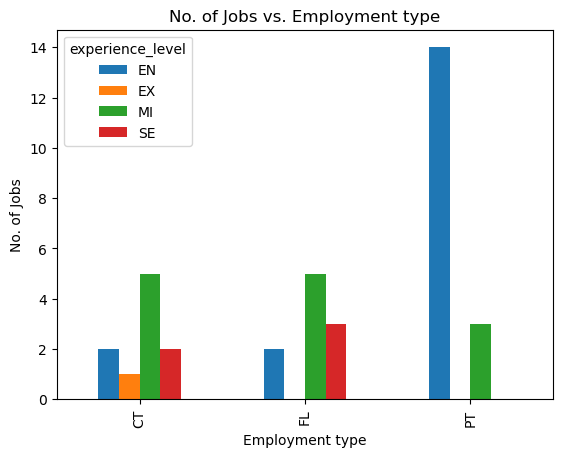

In [26]:
# Plotting Number of Jobs vs. Employment types and Experience Level (excluding FT employees)

df_clean_excluded_FT=df_clean.loc[df_clean["employment_type"]!= "FT",:]
reduced_dataframe=df_clean_excluded_FT.groupby(["employment_type"]).experience_level.value_counts().reset_index(name="no_of_jobs")
employment_types_series=reduced_dataframe.groupby(["employment_type"])["no_of_jobs"].sum()
making_dataframe=employment_types_series.to_frame().reset_index()

final_dataframe_employment_types = reduced_dataframe[reduced_dataframe["employment_type"].isin(making_dataframe["employment_type"])]
pivot_dataframe_plotting=final_dataframe_employment_types.pivot(index="employment_type", columns ="experience_level", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employment type')
plt.xlabel('Employment type')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig11_jobs_employment_type_experience_level_except_FT.png")
plt.show()

#This plot shows the distribution of different experience levels (Executive-level (EX), Entry-level(EN), Mid-level (MI), Senior-level (SE)) 
# jobs except FT(Full Time) employees since demostrating negligible(1.43%) number of jobs.


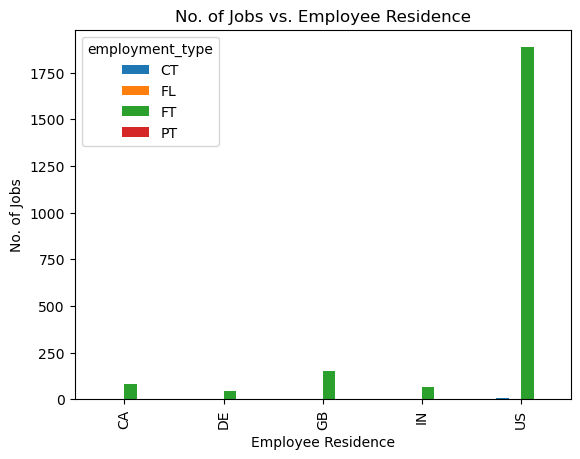

In [27]:
# Plotting Number of Jobs vs. Employment types and Employee residence (demonstrating for two categorical variables)

reduced_dataframe=df_clean.groupby(["employee_residence"]).employment_type.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["employee_residence"])["no_of_jobs"].sum().nlargest(5)
making_dataframe=largest_five_residence_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employee_residence"].isin(making_dataframe["employee_residence"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="employee_residence", columns ="employment_type", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig12_jobs_employee_residence_employment_type.png")
plt.show()

# This plot shows the distribution of employment types Full Time(FT), Contract Type(CT), Freelance(FL), Part Time (PT) in the top 5 (based on the number of jobs) employee residences. 
#For all employee residences, majority of the jobs fall under the category of Full Time(FT), highest being in US.

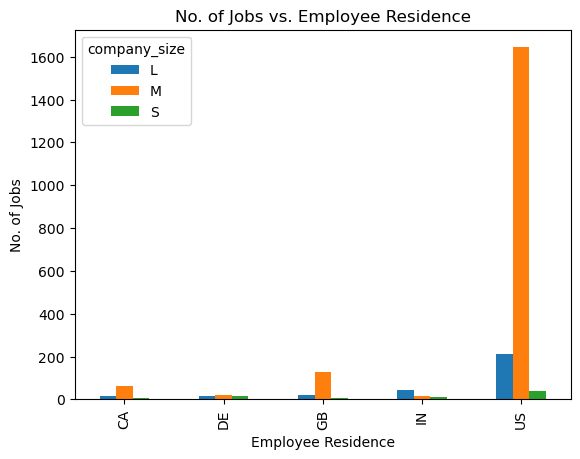

In [28]:
# Plotting Number of Jobs vs. Employee residence and Company size (demonstrating for two categorical variables)

reduced_dataframe=df_clean.groupby(["employee_residence"]).company_size.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["employee_residence"])["no_of_jobs"].sum().nlargest(5)
making_dataframe=largest_five_residence_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employee_residence"].isin(making_dataframe["employee_residence"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="employee_residence", columns ="company_size", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig13_jobs_employee_residence_company_size.png")
plt.show()

# This plot shows the distribution of company sizes Large(L), Medium(M), Small(S) in the top 5 (based on the number of jobs) employee residences. 
#For all employee residences, majority of the jobs are employed by medium(M) size companies.

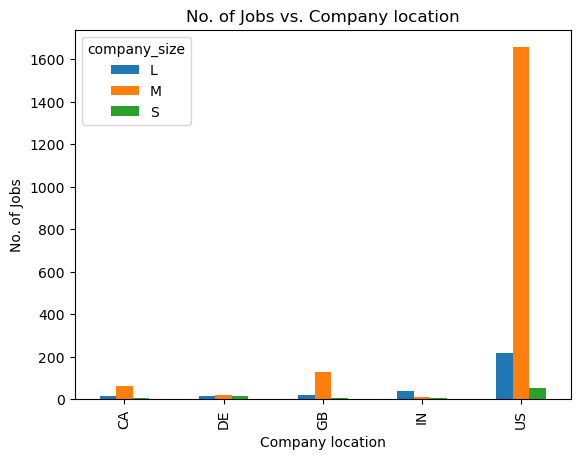

In [29]:
# Plotting Number of Jobs vs. Company location and Company size (demonstrating for two categorical variables)

reduced_dataframe=df_clean.groupby(["company_location"]).company_size.value_counts().reset_index(name="no_of_jobs")
largest_five_company_location_series=reduced_dataframe.groupby(["company_location"])["no_of_jobs"].sum().nlargest(5)
making_dataframe=largest_five_company_location_series.to_frame().reset_index()

final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["company_location"].isin(making_dataframe["company_location"])]

pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="company_location", columns ="company_size", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Company location')
plt.xlabel('Company location')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_GC/Fig14_jobs_company_location_company_size.png")
plt.show()

# This plot shows the distribution of company sizes Large(L), Medium(M), Small(S) in the top 5 (based on the number of jobs) company locations. 
#For all company locations, majority of the jobs are employed by medium(M) size companies.

/var/folders/m8/djwm7c7s5t93w9z1ncqx7jsh0000gn/T/ipykernel_1289/1444762973.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(remote_ratio_median_salary["remote_ratio"], rotation=45)


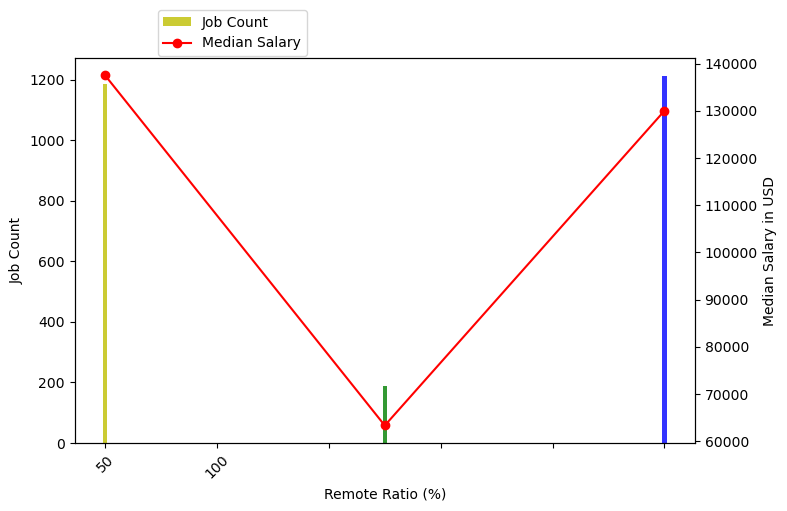

In [48]:
#Demonstarting multivariate analysis (Median Salary vs Remote work ratio vs job count)

#calculating median salaries for remote ratio categories
remote_ratio_median_salary= df_clean.groupby("remote_ratio")["salary_in_usd"].median().reset_index()
remote_ratio_median_salary= round(remote_ratio_median_salary,2)

#remote ratio job counts column creation and addition to the dataframe 
job_count=[1186, 187, 1211]
remote_ratio_median_salary["job_count"]= job_count

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(8, 5))
colors = ["y", "g", "b"]

# Bar plot for job count with specified colors
ax1.bar(remote_ratio_median_salary["remote_ratio"], remote_ratio_median_salary["job_count"], alpha=0.8, color=colors, label="Job Count")
ax1.set_xlabel('Remote Ratio (%)')
ax1.set_ylabel('Job Count')
ax1.tick_params(axis='y')
ax1.set_xticklabels(remote_ratio_median_salary["remote_ratio"], rotation=45)

# Create a second y-axis for Median salary
ax2 = ax1.twinx()
ax2.plot(remote_ratio_median_salary["remote_ratio"], remote_ratio_median_salary["salary_in_usd"], color='r', marker='o', label='Median Salary')
ax2.set_ylabel('Median Salary in USD')
ax2.tick_params(axis='y')

# Add legend
fig.legend(loc="upper left", bbox_to_anchor=(0.22, 0.99))